In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time
#!pip install fastparquet

In [2]:
# Time loading the csv file
to=time.time()
df = pd.read_csv('volbrain_data.csv', sep=';')
print("Time to load the csv file: ", time.time()-to)
# Save as parquet file to accelerate the loading
df.to_parquet("volbrain_data.parquet", engine='fastparquet')
to=time.time()
df = pd.read_parquet('volbrain_data.parquet', engine='fastparquet')
print("Time to load the parquet file: ", time.time()-to)


C:\Users\Jose\AppData\Local\Temp\ipykernel_22348\2840695894.py:3: DtypeWarning: Columns (280) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('volbrain_data.csv', sep=';')


Time to load the csv file:  20.781075477600098
Time to load the parquet file:  2.5254180431365967


In [11]:
# Load data
df = pd.read_parquet('volbrain_data.parquet', engine='fastparquet')


# Fast description of database

We have "UNKNOWN" values in sex and age 


In [12]:
# Replace 'UNKNOWN' values with NaN

def correct_age(age):
    if isinstance(age, str) and age == "UNKNOWN":
        return age
    elif isinstance(age, str) and age != "UNKNOWN":
        age = int(age)
        if age > 150:
            return "UNKNOWN"
        else:
            return int(age)
    elif isinstance(age, (int, float, str)) and age > 150:
        age = "UNKNOWN"
    return age

original_shape = df.shape[0]
print("Total number of counts:", original_shape)

df['Age'] = df['Age'].apply(correct_age)
df = df[(df['Sex'] != 'UNKNOWN') & (df['Age'] != 'UNKNOWN')]

print("Number of counts where Age and Sex missing:", original_shape - df.shape[0])
print(f"Lossed {100*(original_shape - df.shape[0])/original_shape:.2f}% of the data")


Total number of counts: 95172
Number of counts where Age and Sex missing: 48640
Lossed 51.11% of the data


Data acquisition through time on a platform

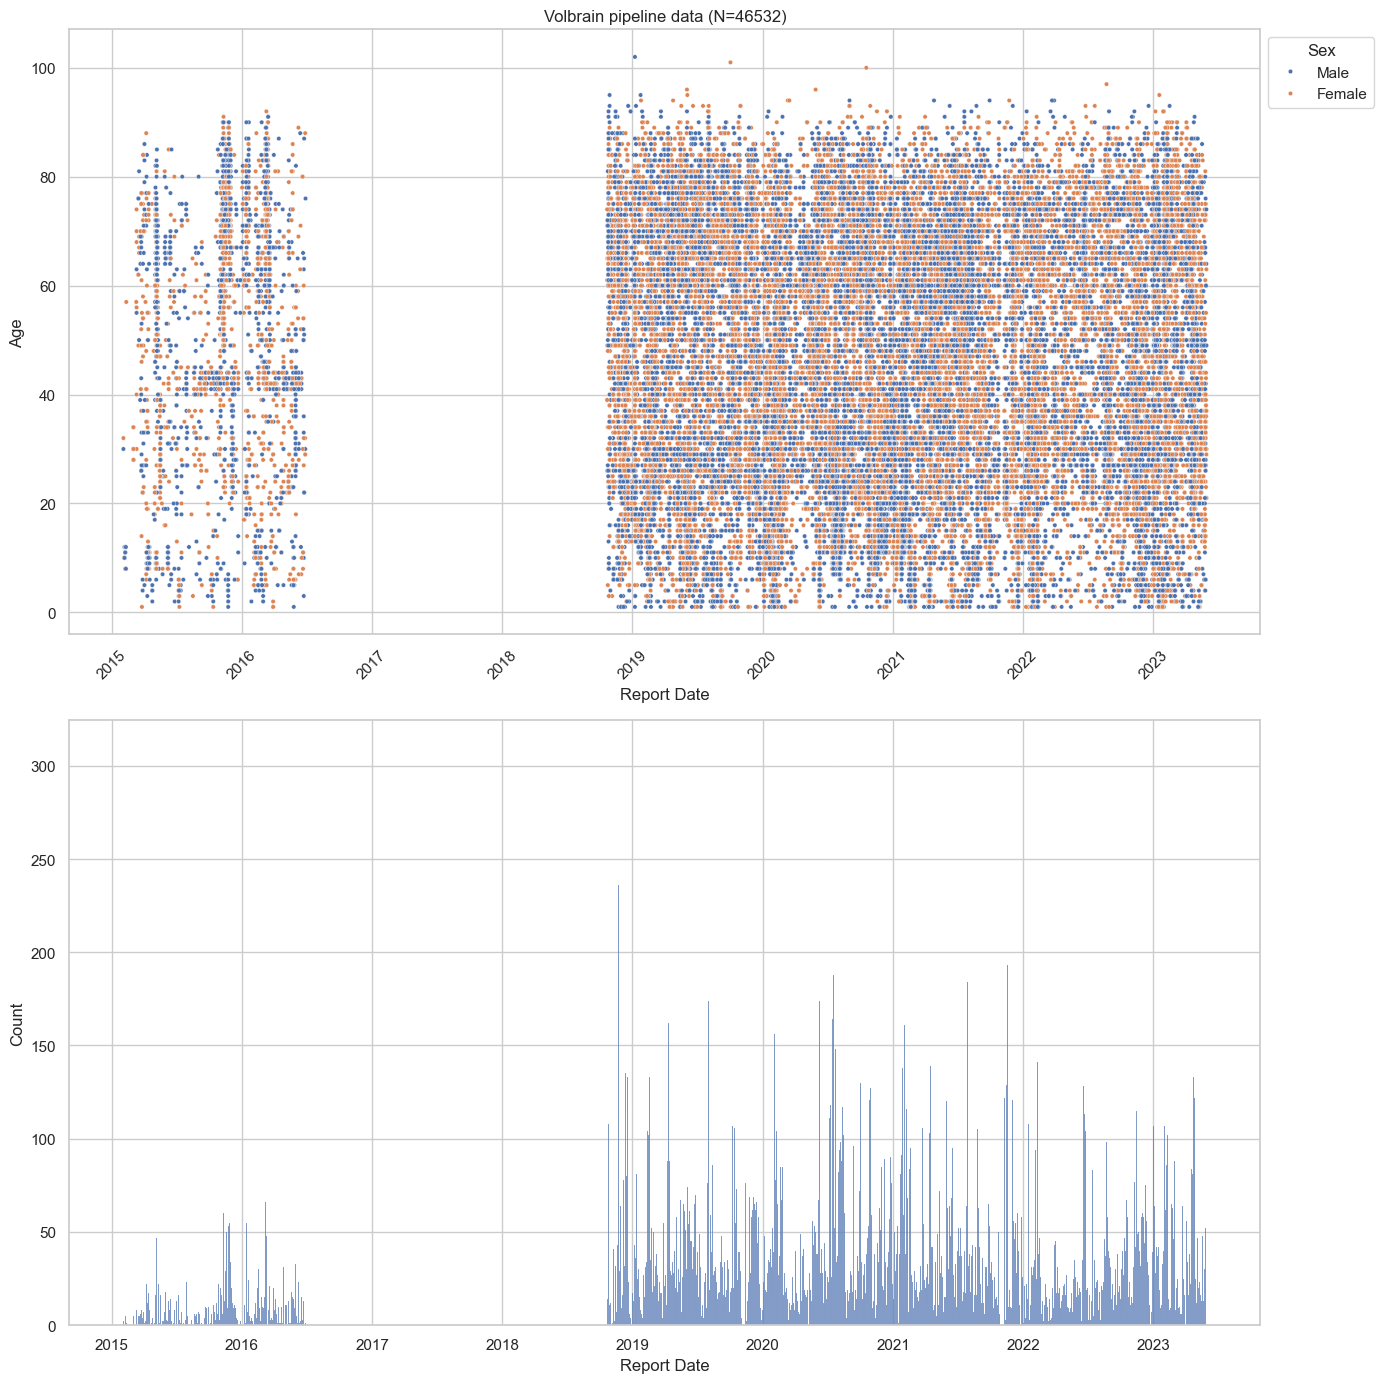

In [15]:
df['Report Date'] = pd.to_datetime(df['Report Date'])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))

sns.set(style="whitegrid")  # Set the style of the plot

# Plot scatter plot on ax1
scatter_plot = sns.scatterplot(data=df, x='Report Date', y='Age', hue='Sex', s=10, ax=ax1)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
ax1.set_title(f"Volbrain pipeline data (N={df.shape[0]})")

# Plot count of values for each 'Report Date' on ax2
sns.histplot(data=df, x='Report Date', ax=ax2, bins=len(df['Report Date'].unique()))
ax2.set_ylabel('Count')
ax2.set_xlabel('Report Date')

plt.tight_layout()
plt.show()

For example plot the distribution of some structures

c:\Users\Jose\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Jose\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Jose\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Jose\anaconda3\envs\tf-gpu\lib\

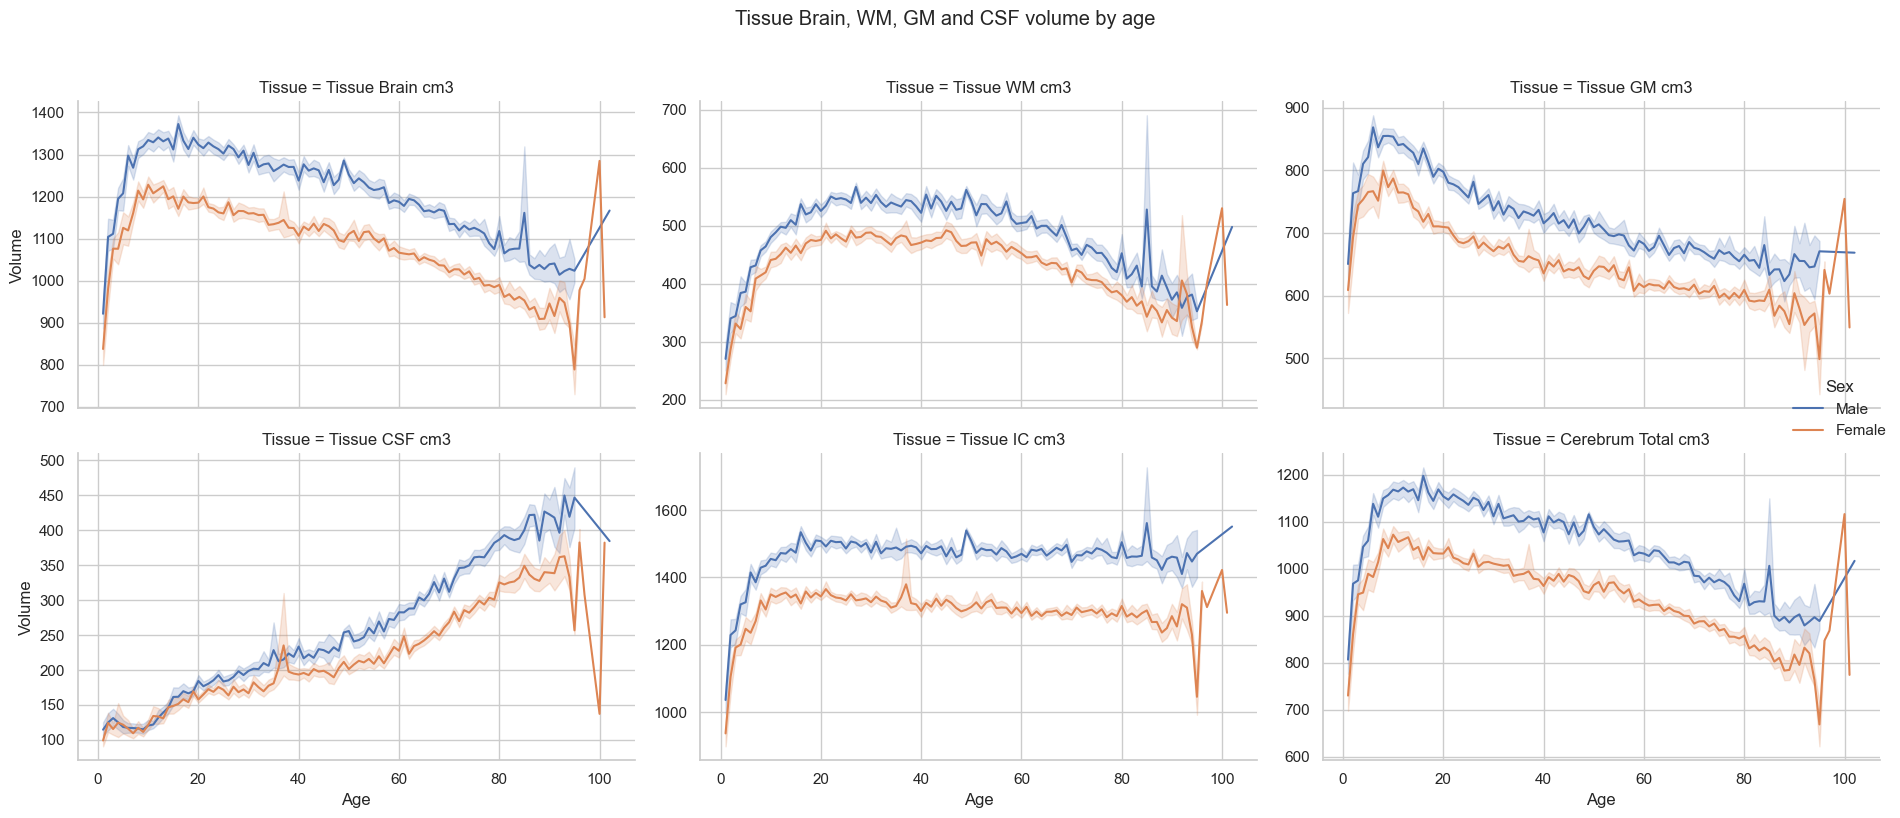

In [17]:
structures_to_plot = ['Tissue Brain cm3', 'Tissue WM cm3', 'Tissue GM cm3', 'Tissue CSF cm3', 'Tissue IC cm3','Cerebrum Total cm3']
# Melt the DataFrame to long format
df_melted = df.melt(id_vars=['Age','Sex'], value_vars=structures_to_plot, var_name='Tissue', value_name='Volume')

# Plot with relplot
sns.relplot(data=df_melted, x='Age', y='Volume', hue= 'Sex', kind='line', col='Tissue', col_wrap=3, facet_kws={'sharey': False}, height=4, aspect=1.5)
plt.suptitle("Tissue Brain, WM, GM and CSF volume by age", y=1.02)
plt.tight_layout()
plt.show()